In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")

# Lab 4 – Hypothesis and Permutation Testing

## Instructions

Welcome to the fourth DSC 259 lab this quarter!

This Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems. The notebook is *only* for displaying a readable version of your final answers. The coding will be done in an accompanying `lab.py` file that is imported into the current notebook, and **you will only submit that `lab.py` file**, not this notebook!

Some additional guidelines:
- **Labs will have both public tests and hidden tests.** The bulk of your grade will come from your scores on hidden tests, which you will only see on Gradescope after the assignment deadline.
- **Do not change the function names in the `lab.py` file!** The functions in the `lab.py` file are how your assignment is graded, and they are graded by their name. If you changed something you weren't supposed to, you can find the original code in the [course GitHub repository](https://github.com/dsc-courses/dsc259r-2026-wi).
- Notebooks are nice for testing and experimenting with different implementations before designing your function in your `lab.py` file. You can write code here, but make sure that all of your real work is in the `lab.py` file, since that's all you're submitting.
- You are encouraged to write your own additional helper functions to solve the lab, as long as they also end up in `lab.py`.

**To ensure that all of the work you want to submit is in `lab.py`, we've included a script named `lab-validation.py` in the lab folder. You shouldn't edit it, but instead, you should call it from the command line (e.g. the Terminal) to test your work.** More details on its usage are given at the bottom of this notebook.

**Importing code from `lab.py`**:

* Below, we import the `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [4]:
import pandas as pd
import numpy as np
import io
from pathlib import Path
import os

<div class="alert alert-block alert-danger" markdown="1">

**You cannot use `for`-loops in Part 1 (Time Series Data) or Part 2 (Hypothesis Testing), but you can use them in Part 3 (Permutation Testing).**

</div>

## Part 1: Time Series Data

Imagine that you own an online store and you'd like to monitor the visits to your site. You've collected information about different login dates and times for different users and stored it in `data/login_table.csv`. Some users are unique, while some visited your store multiple times.

Answer the questions below to better understand the login patterns of your users.

### Question 1 – Prime Time ⏰

Complete the implementation of the function `prime_time_logins`, which takes in a DataFrame like `login` and outputs a DataFrame indexed by `'Login Id'`, counting the number of prime-time logins for each user – that is, the number of logins that were between 4PM (inclusive) and 8PM (exclusive) for each user. The DataFrame should have just one column, named `'Time'`.

For example, if a user logs in at 5PM on Day 1, at 1PM on Day 2, at 6PM on Day 2, and at 7PM on Day 2, then their total number of prime-time logins is 3. Note that the values in your returned DataFrame should only include counts, not timestamp objects.

***Note***: You do not need to use Python's `datetime` module – instead, use the built-in `pandas` methods for working with times that we introduced in our lectures (though you may need to do a bit more research to fully answer the question).

In [5]:
# don't change this cell -- it is needed for the tests to work
fp = Path('data') / 'login_table.csv'
login = pd.read_csv(fp)
q1_result = prime_time_logins(login)

In [6]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2 – Return Users 🔁

As a site owner, you would like to find your most enthusiastic users – the ones who return to your site most frequently. You've noticed that there are users who have several logins and users who logged in only once. You are interested in finding the number of logins *per day* for each user – that is, **their total number of logins divided by the total number of days they've been on your site**.

Complete the implementation of the function `count_frequency`, which takes in a DataFrame like `login` and outputs a Series containing the number of logins per day for each user. Your Series should have `'Login Id'`s in its index, and the frequencies as its values. The order of users in the index is arbitrary.

To do this, you should assume today is January 31st, 2024 and use 11:59:00PM as the current time. The first login date of a user is the first day of their membership on the site, and you may assume they are still a member today. For simplicity, you only need to count full days that a user has been a member till the end of today. For example, if a user's first login was 12 days and 5 hours ago, you can say that they have been a user for 12 days. 

***Hint***: Can you write a custom aggregator that allows you to do this with just one call of the `groupby` method?

In [7]:
# don't change this cell -- it is needed for the tests to work
fp = Path('data') / 'login_table.csv'
login = pd.read_csv(fp)
q2_result = count_frequency(login)

In [8]:
grader.check("q2")

q2 results: All test cases passed!

<div class="alert alert-block alert-danger" markdown="1">

**You cannot use `for`-loops in Part 1 (Time Series Data) or Part 2 (Hypothesis Testing), but you can use them in Part 3 (Permutation Testing).**

</div>

## Part 2: Hypothesis Testing

In this section, you'll recall the terms and structure of hypothesis testing.

The first step is always to define what you're looking at, create your hypotheses, and set a level of significance (i.e. a p-value cutoff). Once you've done that, you can find a p-value.

The following example describes a real-world scenario, which should help keep it easy to interpret.

### Question 3 – Baking Sale 🧁

At UC San Diego, students are looking to buy treats at a bake sale on Library Walk. There is a pop-up bake stand selling cookies and cupcakes to students. Last Saturday, this stand sold 250 cookies to UCSD students. After eating the cookies, 15 students complained that their cookies were burnt, leaving a bitter taste in their mouths. In response to the student dissatisfaction, the stand claims that 96% of their cookies are baked perfectly without any burning. You think this seems unlikely and decide to investigate.

First, select a significance level for your investigation. You don't need to turn this in anywhere. Then, complete the implementation of the following two functions.

#### `cookies_null_hypothesis`

Complete the implementation of the function `cookies_null_hypothesis`, takes in no arguments and returns your answer(s) to the following question **as a list**.

What are reasonable choices for the **null hypothesis** for your investigation? Select all that apply.
1. The stand sells cookies that are approximately 4% burnt. 
2. The stand sells cookies that are 96% perfectly baked.
3. The stand sells cookies that are less than 96% perfectly baked. 
4. The stand sells cookies that are at least 4% burnt.

<br>

#### `cookies_p_value`

Complete the implementation of the function `cookies_p_value`, which takes in an integer `N` and returns the estimated p-value of your investigation upon simulating the null hypothesis `N` times. (The p-value is an estimate of the true theoretical p-value of your test since it relies on simulation.)

***Note***: Plot the null distribution and your observed statistic to check your work. (If you decide to plot, you may have to run `import matplotlib.pyplot as plt` or `import plotly.express as px`.)

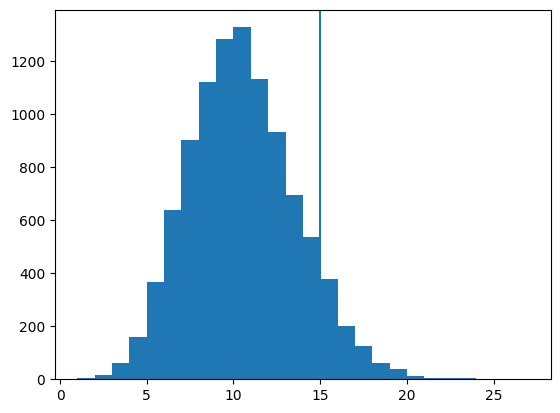

In [9]:
import matplotlib.pyplot as plt

sims = np.random.binomial(250, 0.04, size=10000)
plt.hist(sims, bins=range(sims.min(), sims.max()+2))
plt.axvline(15)
plt.show()


In [11]:
grader.check("q3")

q3 results: All test cases passed!

Now that we've gotten our feet wet with hypothesis testing, let's take a closer look at how to choose null and alternative hypotheses and test statistics.

### Question 4 – Tires 🚗

A tire manufacturer, TritonTire, claims that their tires are so good, they will bring a Toyota Highlander from 60 MPH to a complete stop in under 106 feet, 95% percent of the time.

Now, you own a Toyota Highlander equipped with TritonTire tires, and you decide to test this claim. You take your car to an empty Vons parking lot, speed up to exactly 60 MPH, hit the brakes, and measure the stopping distance. As illegal as it is, you repeat this process 50 times and find that **you stopped in under 106 feet only 47 of the 50 times**.

Livid, you call TritonTire and say that their claim is false. They say, no, that you were just unlucky: your experiment is consistent with their claim. But they didn't realize that they are dealing with a *data scientist* 🧑‍🔬.

To settle the matter, you decide to unleash the power of the hypothesis test. The following three subparts ask you to answer a total of four select-all multiple choice questions.

#### Question 4.1: `car_null_hypothesis` and `car_alt_hypothesis`

You will set up a hypothesis test in order to test your suspicion that the tires are are actually worse than claimed. Which of the following are valid null and alternative hypotheses for this hypothesis test?

1. The tires will stop your car in under 106 feet exactly 95% of the time.
0. The tires will stop your car in under 106 feet less than 95% of the time.
0. The tires will stop your car in under 106 feet greater than 95% of the time.
0. The tires will stop your car in more than 106 feet exactly 5% of the time.
0. The tires will stop your car in more than 106 feet less than 5% of the time.
0. The tires will stop your car in more than 106 feet greater than 5% of the time.

Complete the implementation of the function `car_null_hypothesis`, which takes zero arguments and returns a list of integers, corresponding to the the valid null hypotheses above.
Also complete the implementation of the function called `car_alt_hypothesis`, which takes zero arguments and returns a list of integers, corresponding to the valid alternative hypotheses above given your observation.

<br>

#### Question 4.2: `car_test_statistic`

Which of the following are valid test statistics for our question?

1. The number of times the car stopped in under 106 feet in 50 attempts.
1. The average number of feet the car took to come to a complete stop in 50 attempts.
1. The number of attempts it took before the car stopped in under 95 feet.
1. The proportion of attempts in which the car stopped in under 106 feet in 50 attempts.

Complete the implementation of the function `car_test_stat`, which takes zero arguments and returns a list of integers, corresponding to the valid test statistics above.

<br>

#### Question 4.3: `car_p_value`

The p-value is the probability, under the assumption the null hypothesis is true, of observing a test statistic **equal to our observed statistic, or more extreme in the direction of the alternative hypothesis**.

Why don't we just look at the probability of observing a test statistic equal to our observed statistic? That is, why is the "more extreme in the direction of the alternative hypothesis" part necessary?

1. Because our observed test statistic isn't extreme.
2. Because our null hypothesis isn't suggesting equality.
3. Because the probability of finding our observed test statistic equals the probability of finding something more extreme.
4. Because if we run more and more trials, the probability of observing any particular test statistic gets closer and closer to zero.

Complete the implementation of the function `car_p_value`, which takes zero arguments and returns the correct reason as an **integer** (not a list).

In [12]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5 – Superheroes 🦸

In the previous two questions, we ran hypothesis tests that didn't require us to look at stored data. In this next question, we'll return to the `heroes` DataFrame from Lab 2, which is read in from the file `data/superheroes.csv`.

Our goal in this section will be to answer the question:

> Are there significantly **more** "good" blond-haired, blue-eyed characters than the general pool of characters?

To answer this question, we will conduct a hypothesis test. You choose the following null hypothesis:

> The proportion of "good" characters among blond-haired, blue-eyed characters is equal to the proportion of "good" characters in the sample population from the current `heroes` DataFrame.

and alternative hypothesis: 

> the distribution of "good" characters among blond-haired, blue-eyed characters is greater than the proportion of "good" characters in the overall population.

To proceed with the hypothesis test, we will need to determine the test statistics for our test.

#### `superheroes_test_statistic`

Which of the following are valid test statistics for our question?

1. The difference in proportions for "good" characters among blond-haired, blue-eyed characters and "good" characters in the overall population. 
1. The number of "good" characters that are blond-haired, blue-eyed.
1. The proportion of blond-haired, blue-eyed characters among all "good" characters.
1. The absolute difference in proportions for "good" characters among blond-haired, blue-eyed characters and "good" characters in the overall population.

Complete the implementation of the function `superheros_test_stat`, which takes zero arguments and returns a list of integers, corresponding to all the valid test statistics above.

---

Regardless of your choice for the above question, we will use the test statistic stated below to complete the implementations of the following functions:

> The proportion of "good" characters among blond-haired, blue-eyed characters.

#### `bhbe_col`

To start, complete the implementation of the function `bhbe_col`, which takes in a DataFrame like `heroes` and returns a Boolean Series that contains `True` for characters that have **both** blond hair and blue eyes, and `False` for all other characters. 

***Note***: If a character's hair color contains the word `'blond'`, uppercase or lowercase, we consider their hair to be blond for the purposes of this question. Similarly, if a character's eye color contains the word `'blue'`, uppercase or lowercase, we consider their eye color to be blue for the purposes of this question.

Fix a significance level (i.e. p-value cutoff) of 1%.

<br>

#### `superheroes_observed_statistic`
Complete the implementation of the function `superheroes_observed_statistic`, which takes in a DataFrame like `heroes` and returns the observed test statistic.

<br>

#### `simulate_bhbe_null` 
Complete the implementation of the function `simulate_bhbe_null`, which takes in a DataFrame like `heroes` and a positive integer `N` and returns an array of length `N`, where each element is a simulated test statistic according to the null hypothesis.

***Hint***: Like in `superheroes_observed_statistic`, you'll need to use both `bhbe_col` and information in the `heroes` DataFrame to complete your simulation. Remember that you cannot use `for`-loops in this question.

<br>

#### `superheroes_p_value` 
Complete the implementation of the function `superheroes_p_value`, which takes in DataFrame like `heroes` and returns a list where:
* The first element is the p-value for the hypothesis test, using 100,000 simulations.
* The second element is `'Reject'` if you reject the null hypothesis and `'Fail to reject'` if you fail to reject the null hypothesis, at the 1% significance level.

In [15]:
# don't change this cell -- it is needed for the tests to work
superheroes_fp = Path('data') / 'superheroes.csv'
heroes = pd.read_csv(superheroes_fp, index_col=0)
bhbe_out = bhbe_col(heroes)
obs_stat_out = superheroes_observed_statistic(heroes)
simulate_bhbe_out = simulate_bhbe_null(heroes, 10)
pval_out = superheroes_p_value(heroes)

In [16]:
grader.check("q5")

q5 results: All test cases passed!

<div class="alert alert-block alert-danger" markdown="1">

**You cannot use `for`-loops in Part 1 (Time Series Data) or Part 2 (Hypothesis Testing), but you can use them in Part 3 (Permutation Testing).**

</div>

## Part 3: Permutation Testing

Recall, hypothesis tests answer questions of the form:

> I have a population distribution, and I have one sample. Does this sample look like it was drawn from the population?

While permutation tests answer questions of the form:

> I have two samples, but no information about any population distributions. Do these samples look like they were drawn from the same population?

Keep this in mind while working on this last part of the lab.

<br>

[Skittles](https://en.wikipedia.org/wiki/Skittles_(confectionery)) 🍬 are made in two locations in the United States: Yorkville, Illinois and Waco, Texas. In these factories, Skittles of different colors are made separately by different machines and combined/packaged into bags for sale. The **tab-separated file** `data/skittles.tsv` contains the contents of 468 bags of Skittles.

Throughout this question, we will compare the color distribution of Skittles between bags made in the Yorkville factory and bags made in the Waco factory. Most people have preferences for their favorite flavor, and there is a surprising amount of variation among the distribution of flavors in each bag.

Look at the variation by bag in the dataset below:

In [17]:
skittles_fp = Path('data') / 'skittles.tsv'
skittles = pd.read_csv(skittles_fp, sep='\t')
skittles.head()

,red,orange,yellow,green,purple,Factory
0,10,15,11,7,18,Yorkville
1,5,12,17,15,10,Yorkville
2,16,11,15,11,9,Waco
3,15,8,13,16,7,Waco
4,11,14,20,8,7,Waco


In [18]:
skittles.shape

(468, 6)

### Question 6 – Orange Skittles 🟠

First, you will investigate if the machine that mixes together the Skittles of different colors might favor one color over another. Use a permutation test to assess whether, on average, bags made in Yorkville have the same number of orange skittles as bags made in Waco. Do this by implementing the functions described below.

<br>

#### `diff_of_means`

Complete the implementation of the function `diff_of_means`, which takes in a DataFrame like `skittles` and returns the **absolute difference** between the **mean** number of orange Skittles per bag from Yorkville and the **mean** number of orange Skittles per bag from Waco.

<br>

#### `simulate_null`

Complete the implementation of the function `simulate_null`, which takes in a DataFrame like `skittles` and returns one simulated instance of the test statistic under the null hypothesis. Note that this will involve shuffling the `'Factory'` column!

<br>

#### `color_p_value`

Complete the implementation of the function `color_p_value`, which takes in a DataFrame like `skittles` and calculates the p-value for the permutation test using 1000 trials.

<br>

Plot the observed statistic, along with the histogram for the simulated distribution, to check your work.

***Note***: In all functions, the default argument for `col` is `'orange'`. Your functions should still work for any color so that you can call it in later questions.

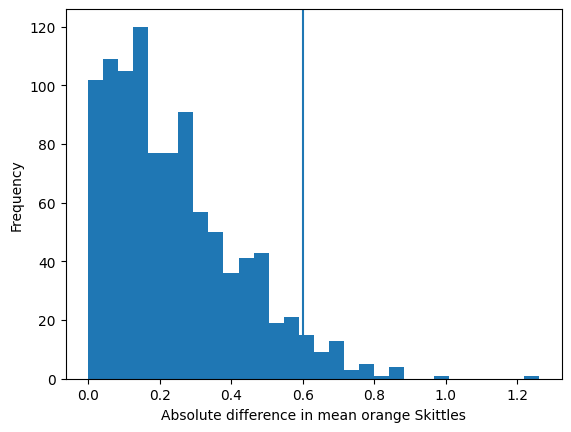

In [24]:
import matplotlib.pyplot as plt

obs = diff_of_means(skittles, 'orange')
sims = np.array([simulate_null(skittles, 'orange') for _ in range(1000)])

plt.hist(sims, bins=30)
plt.axvline(obs)
plt.xlabel("Absolute difference in mean orange Skittles")
plt.ylabel("Frequency")
plt.show()


In [26]:
obs = diff_of_means(skittles, 'orange')

sims = np.array([simulate_null(skittles, 'orange') for _ in range(1000)])

p_value = np.mean(sims >= obs)
p_value


np.float64(0.056)

In [22]:
# don't change this cell -- it is needed for the tests to work
# cell may take about 1-2 minutes to execute to completion
skittles_fp = Path('data') / 'skittles.tsv'
skittles = pd.read_csv(skittles_fp, sep='\\t', engine='python')
q6_diff_of_means_out = diff_of_means(skittles)
q6_simulate_null_out = simulate_null(skittles)
q6_pval_out = color_p_value(skittles)

In [23]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7 – Generalizing to all colors 🔴🟠🟡🟢🟣

While your `color_p_value` function used a default color of `'orange'`, it should also work for all other colors of Skittles, meaning you can run the same permutation test from Question 7 on all colors of Skittles. Call `color_p_value` on all colors of Skittles to find which colors differ the most between the two locations on average. 

Then, complete the implementation of the function `ordered_colors`, which returns a list of five ordered pairs, each of the form `('color', p_value)`. For example, your list might look like `[('pink', 0.000), ('brown', 0.025), ...]`. 

The list should be **hard-coded**, meaning that you should run your permutation tests in your notebook, not in your `.py` file. The list should also be sorted in **increasing order of p-value**. Make sure your p-values are rounded to **3 decimal places**.

Even though there is randomness in the color composition in each bag, this list gives the likelihood that the machines have a systematic, meaningful, difference in how they blend the colors in each bag.

In [27]:
skittles.columns


Index(['red', 'orange', 'yellow', 'green', 'purple', 'Factory'], dtype='object')

In [28]:
colors = ['red', 'orange', 'yellow', 'green', 'purple']

results = []
for c in colors:
    p = color_p_value(skittles, c)
    results.append((c, p))

results


[('red', 0.221),
 ('orange', 0.051),
 ('yellow', 0.0),
 ('green', 0.47),
 ('purple', 0.972)]

In [29]:
sorted_results = sorted(
    [(c, round(p, 3)) for c, p in results],
    key=lambda x: x[1]
)

sorted_results


[('yellow', 0.0),
 ('orange', 0.051),
 ('red', 0.221),
 ('green', 0.47),
 ('purple', 0.972)]

In [30]:
# don't change this cell -- it is needed for the tests to work
q7_out = ordered_colors()
q7_colors = {'green', 'orange', 'purple', 'red', 'yellow'}
q7_test_colors = [x[0] for x in q7_out]

In [31]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8 – Overall distributions 🏭

Now, suppose you would like to assess whether the two locations make similar amounts of each color overall. That is, suppose we:
* Combine and count up all the Skittles of each color that were made in Yorkville (e.g. 14303 total red skittles, 9091 total green skittles, etc.).
* Combine and count up all the Skittles of each color that were made in Waco.

Now, suppose you would like to assess whether the two locations make similar proportions of each color overall. That is, suppose we:
* Calculate the proportion of each Skittles color that were made in Yorkville (e.g. out of the 14704 skittles made, 19.8% of them are red,  18.9% of them are green, etc.).
* Calculate the proportion of each Skittles color that were made in Waco.

**Are these distributions of colors similar?** Is the variation among the bags due to each factory making different amounts of each color?

Use a permutation test to assess whether the distribution of colors of Skittles made in Yorkville is statistically significantly different than those made in Waco. Set a significance level (i.e. p-value cutoff) of 0.01 and determine whether you can reject a null hypothesis that answers the question above using a permutation test with 1000 trials. For your test statistic, use the **total variation distance (TVD)**.

Refer to an example of a [permutation test](https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html) that uses the [TVD](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html) as the test statistic. Some guidance:

- Our previous permutation tests have compared the mean number of (say) orange Skittles in Yorkville bags to the mean number number of orange Skittles in Waco bags. The role of shuffling was to randomly assign bags to Yorkville and Waco.
- In this permutation test, we are **still** shuffling to randomly assign bags to Yorkville and Waco. The only difference is that after we randomly assign each bag to a factory, we will compute the **distribution** of colors among the two factories and find the TVD between those two distributions.

**Your job**: Complete the implementation of the function `same_color_distribution`, which takes in no arguments and outputs a hard-coded **tuple** with the p-value and whether you `'Reject'` or `'Fail to reject'` the null hypothesis.

In [32]:
def tvd(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    return 0.5 * np.abs(p - q).sum()

In [33]:
colors = [c for c in skittles.columns if c != "Factory"]
colors


['red', 'orange', 'yellow', 'green', 'purple']

In [34]:
def color_props_by_factory(df, colors):
    sums = df.groupby("Factory")[colors].sum()
    props = sums.div(sums.sum(axis=1), axis=0)
    return props

props_obs = color_props_by_factory(skittles, colors)

obs_tvd = tvd(props_obs.loc["Yorkville", colors], props_obs.loc["Waco", colors])
obs_tvd


np.float64(0.020404114027914977)

In [35]:
def simulate_tvd_null(df, colors, N=1000):
    sims = np.empty(N)
    for i in range(N):
        shuffled = df.copy()
        shuffled["Factory"] = np.random.permutation(shuffled["Factory"].values)
        props = color_props_by_factory(shuffled, colors)
        sims[i] = tvd(props.loc["Yorkville", colors], props.loc["Waco", colors])
    return sims

sims = simulate_tvd_null(skittles, colors, N=1000)
pval = np.mean(sims >= obs_tvd)
pval


np.float64(0.003)

In [36]:
decision = "Reject" if pval < 0.01 else "Fail to reject"
(pval, decision)


(np.float64(0.003), 'Reject')

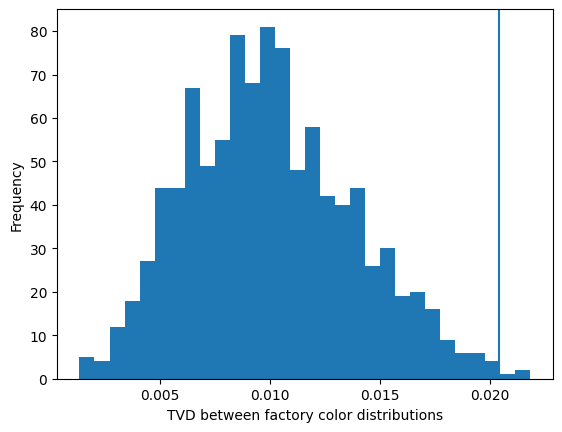

In [37]:
import matplotlib.pyplot as plt

plt.hist(sims, bins=30)
plt.axvline(obs_tvd)
plt.xlabel("TVD between factory color distributions")
plt.ylabel("Frequency")
plt.show()


In [38]:
# don't change this cell -- it is needed for the tests to work
q8_out = same_color_distribution()

In [39]:
grader.check("q8")

q8 results: All test cases passed!

### Question 9 – Permutation testing vs. hypothesis testing 🧪

In each of the following scenarios, decide  whether  a  permutation test is appropriate to determine if there is a  significant difference between the quantities described. If a permutation test is appropriate, mark `'P'`. Otherwise, mark `'H'`.

Record your answers in the function `perm_vs_hyp`, which outputs a list of length 5, containing the values `'P'` and `'H'`.

1. Compare the DSC 80 pass rate between second years and third years who take the class.
2. Compare the proportion of Data Science majors who have completed DSC 80 and the proportion of Data Science minors who have completed DSC 80.
3. Compare the proportion of students who have iPhones to the proportion of students who have Android phones (for simplicity, assume that all students either have an iPhone or an Android).
4. In DSC 80, we ask all students whether they liked DSC 40A or DSC 40B more. Compare the proportion of students who preferred DSC 40A to the proportion who preferred DSC 40B.
5. A sales company has two branches, one in city A and one in city B. You want to compare the amount of sales revenue brought in by employees at the two branches.

***Hint***: Think about the type of data you would collect in each case, and how you would simulate new data under the null hypothesis. It will be useful to refer to the explanation at the start of Part 3.

In [40]:
# don't change this cell -- it is needed for the tests to work
q9_out = perm_vs_hyp()

In [41]:
grader.check("q9")

q9 results: All test cases passed!

## Congratulations! You're done Lab 4! 🏁

As a reminder, all of the work you want to submit needs to be in `lab.py`.

To ensure that all of the work you want to submit is in `lab.py`, we've included a script named `lab-validation.py` in the lab folder. You shouldn't edit it, but instead, you should call it from the command line (e.g. the Terminal) to test your work.

Once you've finished the lab, you should open the command line and run, in the directory for this lab:

```
python lab-validation.py
```

**This will run all of the `grader.check` cells that you see in this notebook, but only using the code in `lab.py` – that is, it doesn't look at any of the code in this notebook. If all of your `grader.check` cells pass in this notebook but not all of them pass in your command line with the above command, then you likely have code in your notebook that isn't in your `lab.py`!**

You can also use `lab-validation.py` to test individual questions. For instance,

```
python lab-validation.py q1 q2 q4
```

will run the `grader.check` cells for Questions 1, 2, and 4 – again, only using the code in `lab.py`. [This video](https://www.loom.com/share/0ea254b85b2745e59322b5e5a8692e91?sid=5acc92e6-0dfe-4555-9b6a-8115b6a52f99) how to use the script as well.

Once `python lab-validation.py` shows that you're passing all test cases, you're ready to submit your `lab.py` (and only your `lab.py`) to Gradescope. Once submitting to Gradescope, make sure to stick around until all test cases pass.

There is also a call to `grader.check_all()` below in _this_ notebook, but make sure to also follow the steps above.